In [10]:
#momentum-based
def GD_with_momentum(X, y, theta, alpha, gamma, epochs):
  m = len(y)
  velocity = np.zeros_like(theta)
  for iteration in range(epochs):
    gradients = (1/m) * X.T.dot(X.dot(theta) - y)
    velocity = gamma * velocity + alpha * gradients
    theta = theta - velocity
  return theta

X = np.array([[1,2],[3,4],[5,6]])
y = np.array([1,2,3])
theta = np.zeros(X.shape[1])
alpha = 0.1
gamma = 0.9
epochs = 1000

theta_momentum = GD_with_momentum(X, y, theta, alpha, gamma, epochs)
print("Momentum based GD:",theta_momentum)


Momentum based GD: [-1.89327171e-17  5.00000000e-01]


AdaGrad: [[3.08910875]
 [3.73626968]]


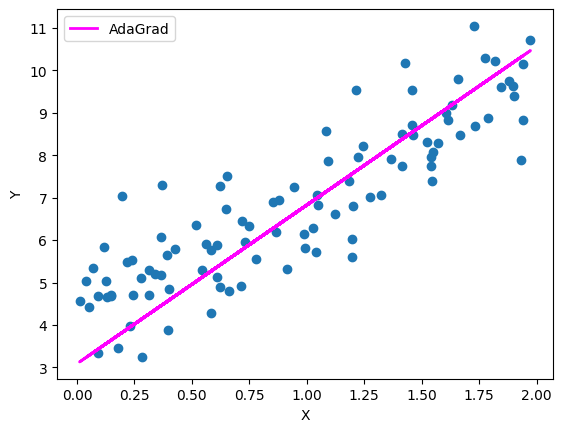

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]

alpha = 0.1
epsilon = 1e-8
epochs = 1000

theta = np.random.randn(2, 1)
gradient_accum = np.zeros_like(theta)

def GD_with_AdaGrad(X, y, theta, alpha, epsilon, epochs):
    m = len(y)
    gradient_accum = np.zeros_like(theta)
    for iteration in range(epochs):
        gradients = (2 / m) * X.T.dot(X.dot(theta) - y)
        gradient_accum += gradients ** 2
        adjusted_gradients = gradients / (np.sqrt(gradient_accum) + epsilon)
        theta = theta - alpha * adjusted_gradients
    return theta

theta = GD_with_AdaGrad(X_b, y, theta, alpha, epsilon, epochs)
print("AdaGrad:", theta)

plt.scatter(X, y)
plt.plot(X, X_b.dot(theta), color='magenta', linewidth=2, label="AdaGrad")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

RMSprop: [[4.16509616]
 [2.72011339]]


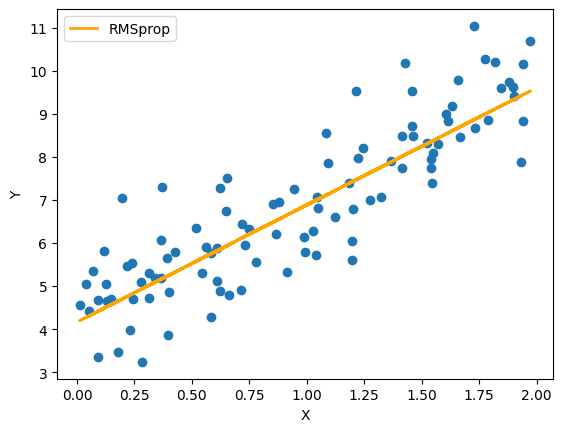

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
learning_rate = 0.1
epsilon = 1e-8
epochs = 1000
beta = 0.9
theta_rms = np.random.randn(2, 1)

def GD_with_RMSprop(X, y, theta, learning_rate, epsilon, beta, epochs):
    m = len(y)
    squared_gradient_accum = np.zeros_like(theta)
    for iteration in range(epochs):
        gradients = (2 / m) * X.T.dot(X.dot(theta) - y)
        squared_gradient_accum = beta * squared_gradient_accum + (1 - beta) * (gradients ** 2)
        adjusted_gradients = gradients / (np.sqrt(squared_gradient_accum) + epsilon)
        theta = theta - learning_rate * adjusted_gradients
    return theta

theta_rms = GD_with_RMSprop(X_b, y, theta_rms, learning_rate, epsilon, beta, epochs)
print("RMSprop:", theta_rms)

plt.scatter(X, y)
plt.plot(X, X_b.dot(theta_rms), color='orange', linewidth=2, label="RMSprop")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()